In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"D:\DS\grip dataset\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

([<matplotlib.axis.XTick at 0x22ddddba688>,
 <a list of 10 Text xticklabel objects>)

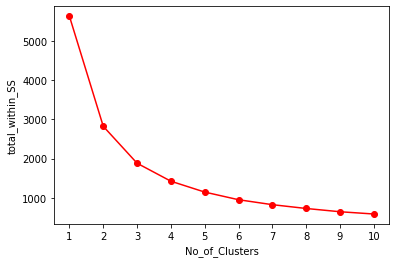

In [6]:
#computing the distance by using two centroid,total within sum of square and within sum of squares
x=df.iloc[:,[0,1,2,3]]
k=list(range(1,11))
k
TWSS=[]
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(x.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,x.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
plt.plot(k,TWSS, 'ro-');
plt.xlabel("No_of_Clusters");
plt.ylabel("total_within_SS");
plt.xticks(k)

In [7]:
model=KMeans(n_clusters=3)
y_kmeans=model.fit_predict(x)

In [8]:
x=x.values

In [10]:
kmeans.cluster_centers_

array([[ 42.5       ,   4.9125    ,   3.2875    ,   1.4375    ],
       [115.        ,   6.61333333,   2.93333333,   5.61333333],
       [  9.5       ,   4.99444444,   3.44444444,   1.41666667],
       [ 85.        ,   5.88666667,   2.77333333,   4.31333333],
       [143.5       ,   6.43571429,   3.06428571,   5.32857143],
       [100.        ,   5.95333333,   2.80666667,   4.72      ],
       [ 26.5       ,   5.1125    ,   3.51875   ,   1.54375   ],
       [ 70.5       ,   6.12857143,   2.80714286,   4.4       ],
       [ 57.        ,   5.99230769,   2.76153846,   4.26153846],
       [129.5       ,   6.82857143,   2.95714286,   5.66428571]])

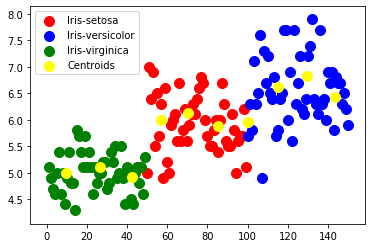

In [9]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

 #Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()